In [1]:
%run library.ipynb

In [2]:
eas = fromfile_tril('../common/ld/22.eas.ld.bin')

In [6]:
bim = pd.read_table(
    '../common/bfile/22.bim',
    delim_whitespace=True,
    names=['CHR', 'SNP', 'MORG', 'POS', 'A1', 'A2'],
)

In [15]:
pos = bim.POS.values

In [12]:
eas.shape, len(bim)

((3196, 3196), 3196)

In [13]:
M = len(bim)

In [11]:
distance = np.empty((M, M))

In [16]:
for x in range(M):
    for y in range(M):
        distance[x, y] = pos[x] - pos[y]

In [17]:
distance = np.abs(distance)

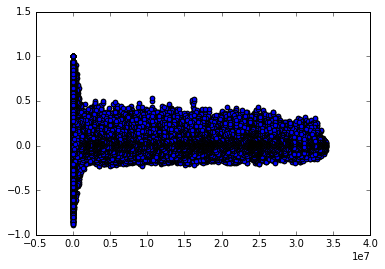

In [19]:
plt.scatter(distance, eas)

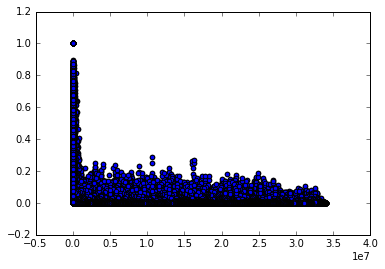

In [20]:
plt.scatter(distance, eas*eas)

In [21]:
import scipy.interpolate as si

In [22]:
f1 = si.interp1d(distance.flatten(), (eas*eas).flatten())

In [27]:
x = np.linspace(0, 3e7, 100)

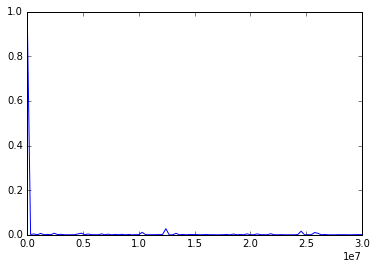

In [28]:
plt.plot(x, f1(x))